In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import expon
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')


print('Info for Training Data')
print(train.info(), '\n')


X_train, y_train = train.drop('Survived', axis=1), train.Survived

Info for Training Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 



In [19]:
def summarise_missing(df):
    '''Reruens field which have missing values, and proportion of missing values'''
    return df.isna().mean()[df.isna().mean() > 0]

print("Missing data from training set:\n")
print(summarise_missing(X_train))

print("\nMissing data from testing set:\n")
print(summarise_missing(X_test))

Missing data from training set:

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

Missing data from testing set:

Age      0.205742
Fare     0.002392
Cabin    0.782297
dtype: float64


In [8]:
len(train)

891

In [20]:
X_train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

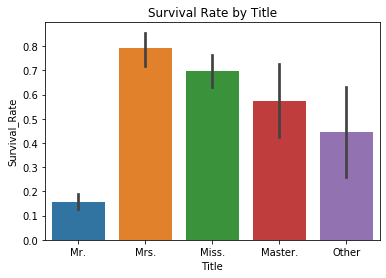

In [27]:
def titles(df=None, title_regex=r',\s(\w+\.)', common_titles=['Mrs.', 'Mr.', 'Miss.', 'Master.']):
    '''Returns a new dateframe with a title field added, based on finding title_regex in name_field'''
    tmp = df.Name.str.extract(title_regex)
    tmp[~tmp.isin(common_titles)] = 'Other'
    return tmp

def barplot_survival_by_cat(df, category):
    survival_grouped = df.groupby(category, as_index=False).Survived.mean()
    ax = sns.barplot(x=category, y='Survived', data=df)
    plt.title('Survival Rate by {}'.format(category))
    plt.xlabel(category)
    plt.ylabel('Survival_Rate')
    return ax

train['Title'] = titles(train)

barplot_survival_by_cat(train, 'Title')

In [ ]:
class DropFields(object):
    def __init__(self, cols):
        self.cols = cols
    
    def transform(self, x):
        tmp = x.copy()
        return tmp.drop(self.cols, axis=1)
    
    def fit(self, x, y=None):
        return self
    
class AddFeatures(object):
    def __init__(self, features):
        self.features = features:
    
    def transform(self, x):
        tmp = x.copy()
        for name, func in self.feartures.item():
            tmp[name] = func(tmp)
        return self
    
    def fit(self, x, y=None):
        return self
    
class GetDummies(object):
    def __init__(self):
        pass
    
    def transform(self, x):
        tmp = x.copy()
        return pd.get_dummies(tmp)
    
    def fit(self, x, y=None):
        return self

models = {
    'Logistic Regression': LogisticRegression(), 
    'Standard Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosring': KNeigborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

t_steps = [('feature_adder', AddFeatures({'Title': titles}))]